
## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
4. Download the `train.csv` file into this lab folder.
3. Create an iPython notebook and load the csv into pandas.


In [30]:
#Load libraries
import pandas as pd
import numpy as np

In [31]:
#Load data in dataframe
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
#Find the average age of those who survived and those who did not
print('The average age of those who survived is ' + str(train[train['Survived']==1]['Age'].mean()))
print('The average age of those who did not survived is ' + str(train[train['Survived']==0]['Age'].mean()))

The average age of those who survived is 28.343689655172415
The average age of those who did not survived is 30.62617924528302



## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
  - *Bonus* : Theres a good library for visualizing missing values called Missingno.
      - [Install Instructions](https://pypi.org/project/missingno/)
      - [Usage Documentation](https://github.com/ResidentMario/missingno)
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

<AxesSubplot:>

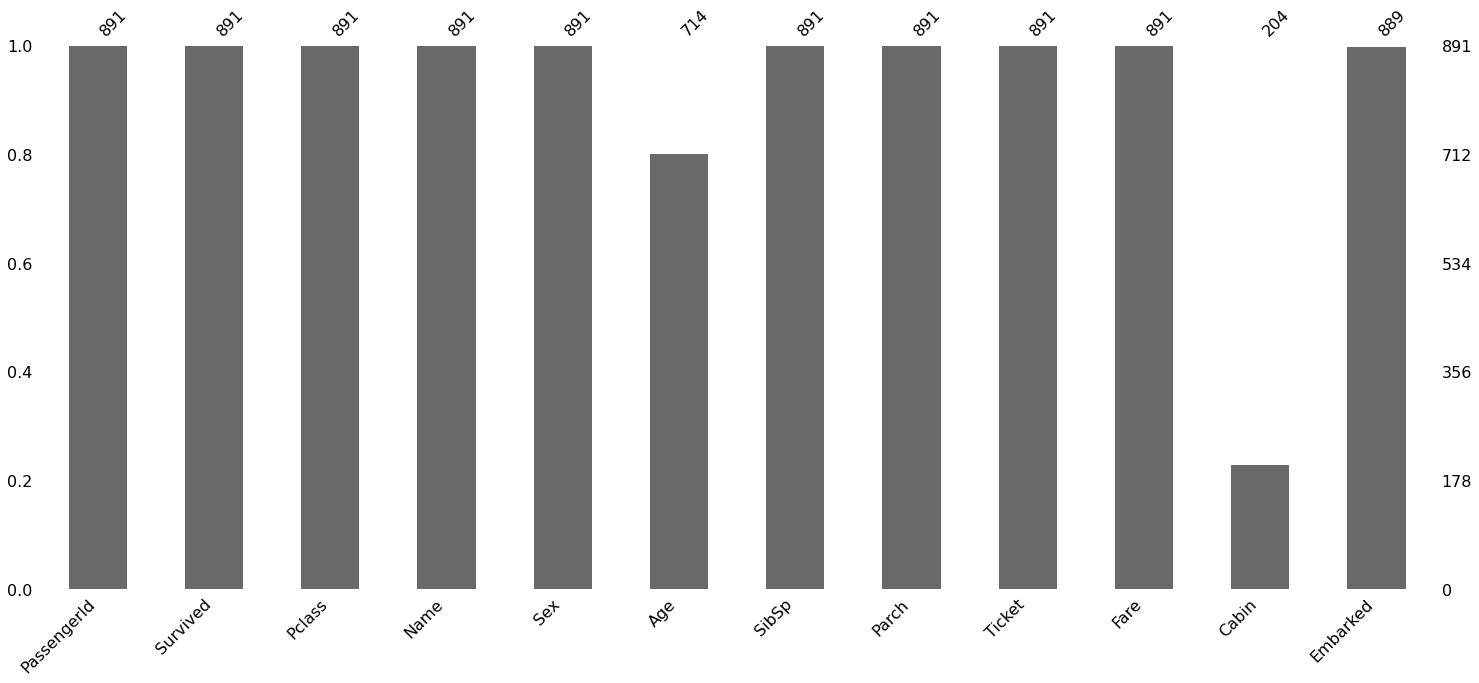

In [33]:
import missingno as msno
#Your code here 
msno.bar(train)
#train.isnull().sum()

In [34]:
#Your code here 
print('Cabin is has the most Nan\n' + str(train.isnull().sum().max()) + ' is empty')

Cabin is has the most Nan
687 is empty


In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
train['Embarked'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [37]:
#Your code here
train.dropna(subset=['Embarked'], inplace=True)

In [38]:
#Your code here 
# Fill all empty cabins with ¯\(ツ)/¯
train['Cabin'][train['Cabin'].isnull()] = '¯\(ツ)/¯'

<ipython-input-38-f52206d80b37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Cabin'][train['Cabin'].isnull()] = '¯\(ツ)/¯'


In [39]:
train['Cabin']

0      ¯\(ツ)/¯
1          C85
2      ¯\(ツ)/¯
3         C123
4      ¯\(ツ)/¯
        ...   
886    ¯\(ツ)/¯
887        B42
888    ¯\(ツ)/¯
889       C148
890    ¯\(ツ)/¯
Name: Cabin, Length: 889, dtype: object

## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

In [40]:
#Your code here
train['FamilyCount'] = train['SibSp'] + train['Parch'] #Q1

In [41]:
train['IsReverend'] = train['Name'].str.contains('Rev.').astype(int) #Q2

In [42]:
#Your code here 
train['Embarked_C'] = pd.get_dummies(train['Embarked'])['C']
train['Embarked_Q'] = pd.get_dummies(train['Embarked'])['Q']
train['Embarked_S'] = pd.get_dummies(train['Embarked'])['S']
train['Embarked_male'] = pd.get_dummies(train['Sex'])['male']
train['Embarked_female'] = pd.get_dummies(train['Sex'])['female']

In [43]:
#Your code here 

In [44]:
#Your code here 

In [45]:
#Your code here 

In [46]:
#Your code here 

## Step 4: Exploratory analysis 
_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

In [47]:
# 1. What was the survival rate overall?

survival_rate = train['Survived'].sum()/len(train['PassengerId'])
print(f'1. The survival rate overall is {round(survival_rate*100,2)}%.')

1. The survival rate overall is 38.25%.


In [48]:
# 2. Which gender fared the worst? What was their survival rate?

FSur = train.groupby(['Sex'])['Survived'].sum()[0]
MSur = train.groupby(['Sex'])['Survived'].sum()[1]
FNum = train['Sex'].value_counts()[1]
MNum = train['Sex'].value_counts()[0]
MSurRate = MSur/MNum
FSurRate = FSur/FNum
if FSurRate<MSurRate:
    print(f'2. Female fared worst. Their survival rate is {round(FSurRate*100,2)}%')
elif FSurRate>MSurRate:
    print(f'2. Male fared worst. Their survival rate is {round(MSurRate*100,2)}%')
elif FSurRate==MSurRate:
    print(f'2. Both fared equally. Their survival rate is {round(FSurRate*100,2)}%')

2. Male fared worst. Their survival rate is 18.89%


In [49]:
# 3. What was the survival rate for each Pclass?

for i in train['Pclass'].unique(): # Loop over each Pclass
    SurRate = len(train[(train['Pclass']==i)&(train['Survived']==1)]) / train['Pclass'].value_counts()[i] # Calculate Survival rate = No. of survivors in each Pclass / No. of total passengers in each Pclass
    print(f'3. The survival rate of Pclass {i} is {round(SurRate*100,2)}%')

3. The survival rate of Pclass 3 is 24.24%
3. The survival rate of Pclass 1 is 62.62%
3. The survival rate of Pclass 2 is 47.28%


In [50]:
# 4. Did any reverends survive? How many?

RevSur = len(train[(train['Name'].str.contains('Rev.').astype(int)) & (train['Survived']==1)])
print(f'4. {RevSur} reverends survived.')

4. 0 reverends survived.


In [51]:
# 5. What is the survival rate for cabins marked ¯\(ツ)/¯

SurRate = len(train[(train['Cabin']=='¯\(ツ)/¯')&(train['Survived']==1)]) / train.groupby('Cabin')['Survived'].count()['¯\(ツ)/¯']
print(f'5. Survival rate for cabins marked ¯\(ツ)/¯ is {round(SurRate*100,2)}%')

5. Survival rate for cabins marked ¯\(ツ)/¯ is 29.99%


In [52]:
# 6. What is the survival rate for people whose Age is empty?

SurRate = len(train[train['Age'].isna()&(train['Survived']==1)]) / len(train[train['Age'].isna()])
print(f'5. Survival rate for people whose Age is empty is {round(SurRate*100,2)}%')

5. Survival rate for people whose Age is empty is 29.38%


In [53]:
# 6. What is the survival rate for each port of embarkation?
for col in train.columns[14:17]:
    SurRate = len(train[(train[col]==1) & (train['Survived']==1)]) / len(train[train[col]==1])
    print(f'6. Survival rate at {col} is {round(SurRate*100,2)}%')

6. Survival rate at Embarked_C is 55.36%
6. Survival rate at Embarked_Q is 38.96%
6. Survival rate at Embarked_S is 33.7%


In [54]:
# 6. What is the survival rate for each port of embarkation? Alternative:
for col in train.columns[14:17]:
    SurRate = train.groupby(col)['Survived'].sum()[1] / train.groupby(col)['Survived'].count()[1]
    print(f'6. Survival rate at {col} is {round(SurRate*100,2)}%')

6. Survival rate at Embarked_C is 55.36%
6. Survival rate at Embarked_Q is 38.96%
6. Survival rate at Embarked_S is 33.7%


## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


In [55]:
#Your code here
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Survival Rate (%)')

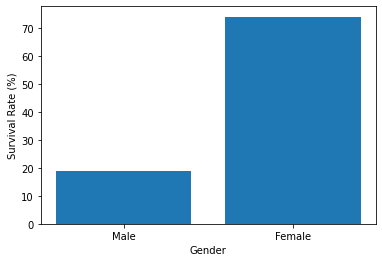

In [86]:
#Survival rate of each gender
plt.bar(['Male', 'Female'], [MSurRate*100,FSurRate*100])
plt.xlabel('Gender')
plt.ylabel('Survival Rate (%)')

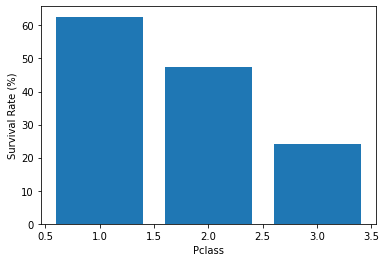

In [102]:
#Survival rate of each Pclass
SurRate=list()
Pclass=list()
for i in train['Pclass'].unique(): # Loop over each Pclass
    SurRate.append(len(train[(train['Pclass']==i)&(train['Survived']==1)]) / train['Pclass'].value_counts()[i]) # Calculate Survival rate = No. of survivors in each Pclass / No. of total passengers in each Pclass
    Pclass.append(i)
plt.bar(Pclass, np.array(SurRate)*100);
plt.xlabel('Pclass');
plt.ylabel('Survival Rate (%)');

/Users/zhiyuantoh/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12484 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhiyuantoh/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12484 missing from current font.
  font.set_text(s, 0, flags=flags)


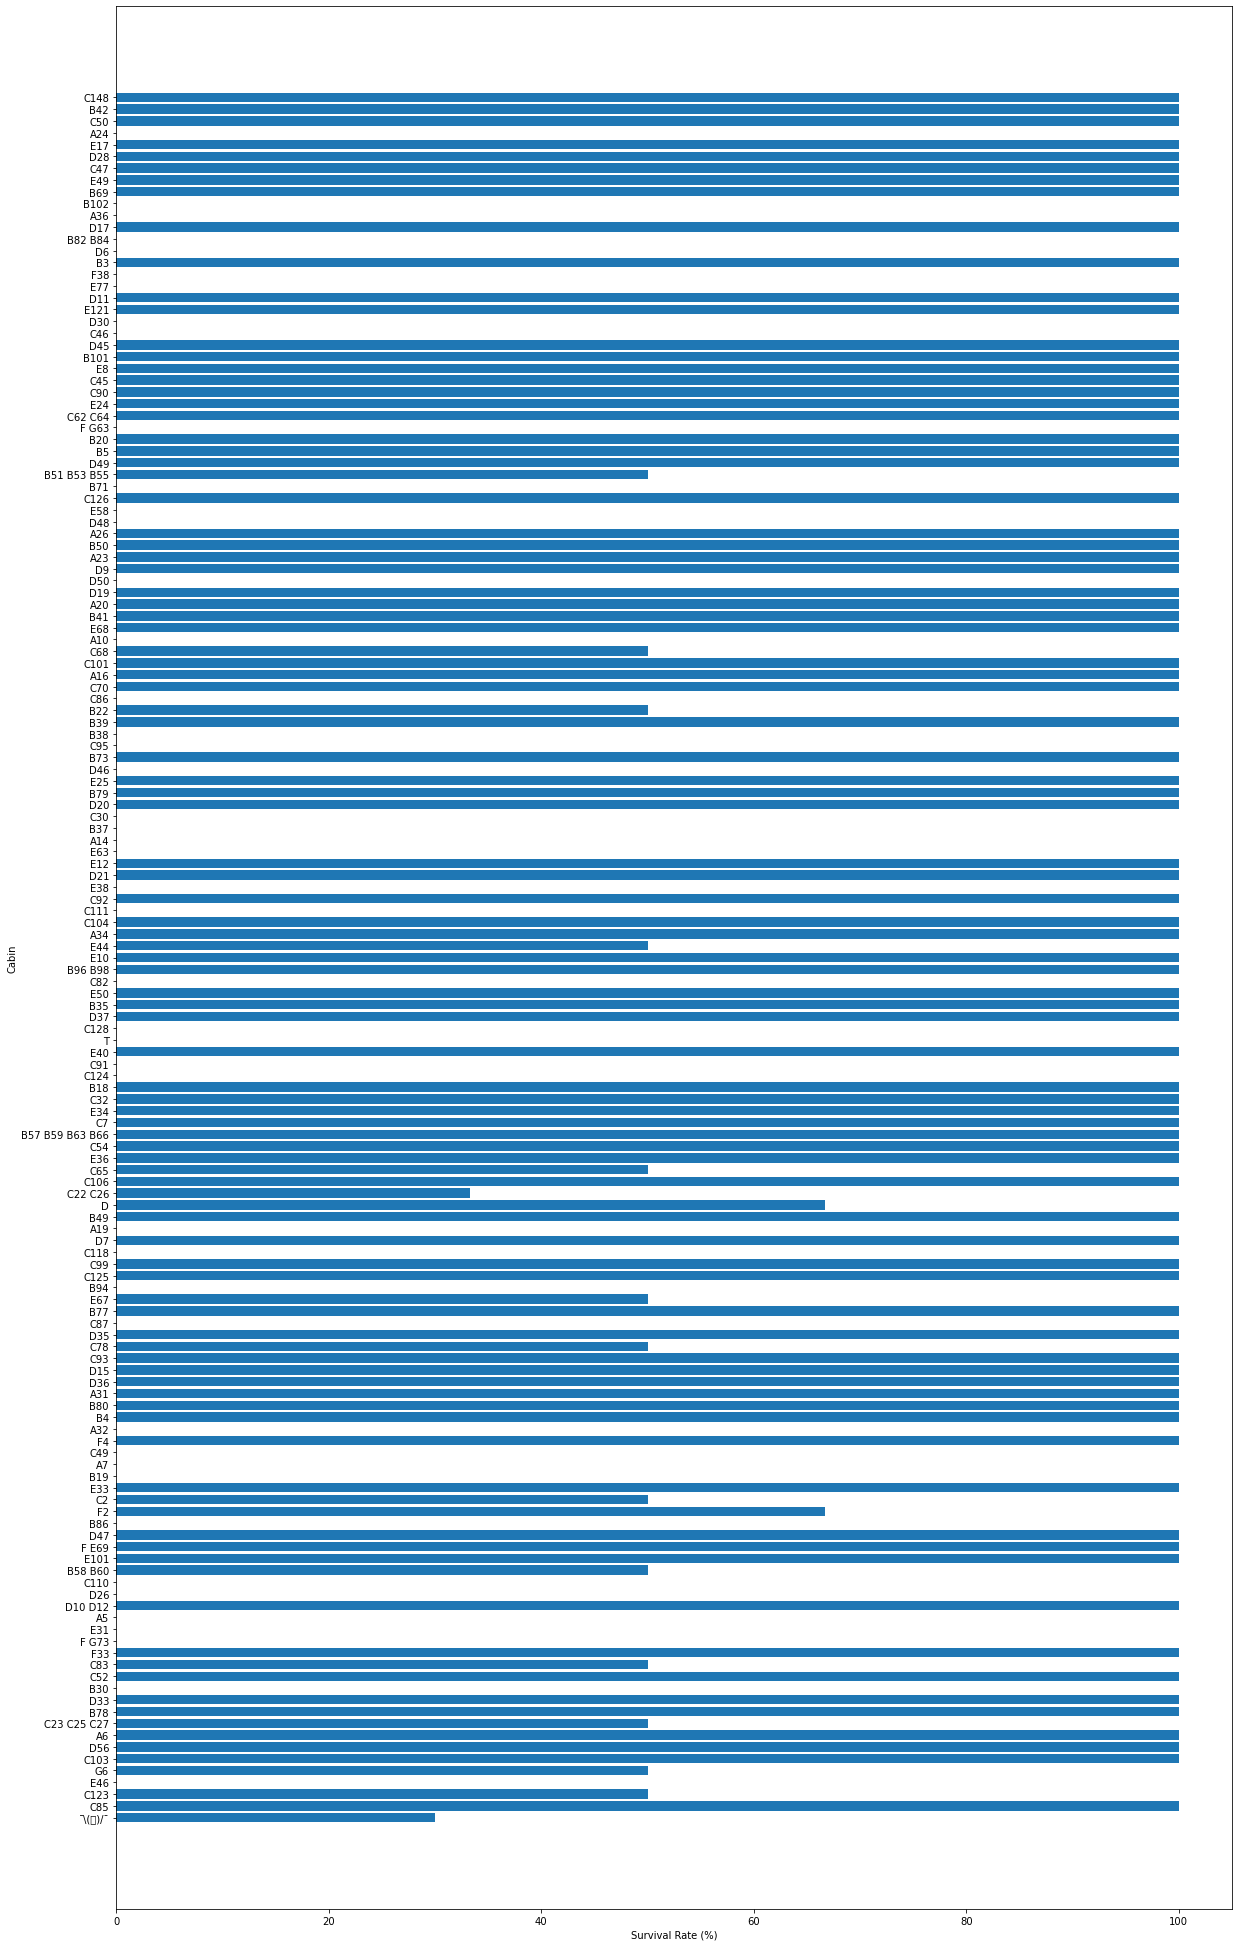

In [120]:
#Survival rate of each Cabin
SurRate=list()
Cabin=list()
for i in train['Cabin'].unique(): # Loop over each Cabin
    SurRate.append(len(train[(train['Cabin']==i)&(train['Survived']==1)]) / train['Cabin'].value_counts()[i]) # Calculate Survival rate = No. of survivors in each Cabin / No. of total passengers in each Cabin
    Cabin.append(i)

plt.figure(figsize=(20,35))
plt.barh(Cabin, np.array(SurRate)*100);
plt.ylabel('Cabin');
plt.xlabel('Survival Rate (%)');

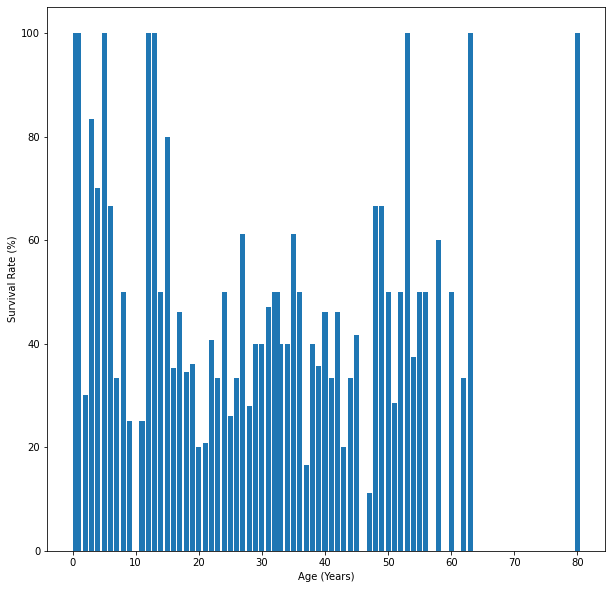

In [131]:
#Survival rate of each Age
Agedf=train.dropna(subset=['Age'])
SurRate=list()
Age=list()
for i in Agedf['Age'].unique(): # Loop over each Age
    SurRate.append(len(Agedf[(Agedf['Age']==i)&(Agedf['Survived']==1)]) / Agedf['Age'].value_counts()[i]) # Calculate Survival rate = No. of survivors in each Age / No. of total passengers in each Age
    Age.append(i)

plt.figure(figsize=(10,10))
plt.bar(Age, np.array(SurRate)*100);
plt.xlabel('Age (Years)');
plt.ylabel('Survival Rate (%)');

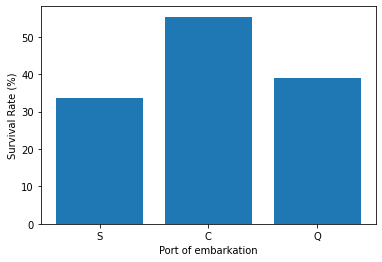

In [133]:
#Survival rate for each port of embarkation

SurRate=list()
Embarked=list()
for i in train['Embarked'].unique(): # Loop over each port of embarkation
    SurRate.append(len(train[(train['Embarked']==i)&(train['Survived']==1)]) / train['Embarked'].value_counts()[i]) # Calculate Survival rate = No. of survivors in each port of embarkation / No. of total passengers in each port of embarkation
    Embarked.append(i)

plt.bar(Embarked, np.array(SurRate)*100);
plt.xlabel('Port of embarkation');
plt.ylabel('Survival Rate (%)');

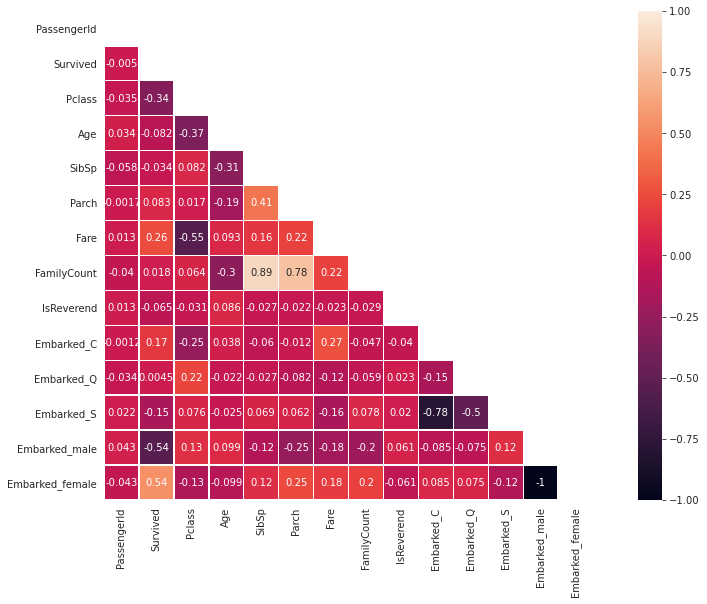

In [140]:
# Correlation of different variables

# Establish size of figure.
plt.figure(figsize = (16,9))

# Get correlation of variables. (statistical significance)
corr = train.corr()

# Set up mask to be "True" in the upper triangle.
# because it will be the mirror image of lower triangle we'll see on our plot.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)